# Análisis exploratoroio EDA

In [1]:
import pandas as pd
import numpy as np
import sidetable

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datos/creditcardmarketing.csv", header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0


In [3]:
columns = ['customer_id','Offer_accepted', 'Reward','Mailer_type','Income_level',
                'Accounts_open','Overdraft_protection','Credit_rating','Credit_cards_held',
             'Homes_owned','Household_size', 'own_home','Q1','Q2','Q3','Q4','Balance']

In [4]:
df.columns=columns

In [5]:
df.head(3)

,customer_id,Offer_accepted,Reward,Mailer_type,Income_level,Accounts_open,Overdraft_protection,Credit_rating,Credit_cards_held,Homes_owned,Household_size,own_home,Q1,Q2,Q3,Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0


In [6]:
df.drop("customer_id", axis=1, inplace=True)

- Entendemos mejor qué información contiene cada variable

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer_accepted        18000 non-null  object 
 1   Reward                18000 non-null  object 
 2   Mailer_type           18000 non-null  object 
 3   Income_level          18000 non-null  object 
 4   Accounts_open         18000 non-null  int64  
 5   Overdraft_protection  18000 non-null  object 
 6   Credit_rating         18000 non-null  object 
 7   Credit_cards_held     18000 non-null  int64  
 8   Homes_owned           18000 non-null  int64  
 9   Household_size        18000 non-null  int64  
 10  own_home              18000 non-null  object 
 11  Q1                    17976 non-null  float64
 12  Q2                    17976 non-null  float64
 13  Q3                    17976 non-null  float64
 14  Q4                    17976 non-null  float64
 15  Balance            

In [8]:
df["Offer_accepted"].value_counts()

No     16977
Yes     1023
Name: Offer_accepted, dtype: int64

In [9]:
# número de nulos 
df.isnull().sum()

Offer_accepted           0
Reward                   0
Mailer_type              0
Income_level             0
Accounts_open            0
Overdraft_protection     0
Credit_rating            0
Credit_cards_held        0
Homes_owned              0
Household_size           0
own_home                 0
Q1                      24
Q2                      24
Q3                      24
Q4                      24
Balance                 24
dtype: int64

In [10]:
# número de duplicados 
df.duplicated().sum()

0

# Análisis exploratorio visual


### Variable respuesta

<AxesSubplot:xlabel='Offer_accepted', ylabel='Count'>

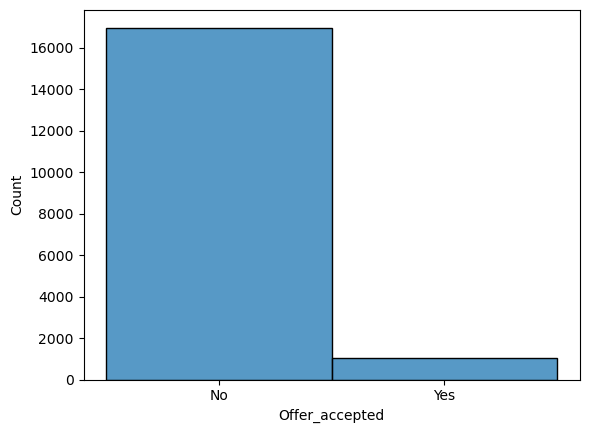

In [11]:
sns.histplot(data=df,
            x="Offer_accepted")

In [12]:
df["Offer_accepted"].value_counts() / df.shape[0]


No     0.943167
Yes    0.056833
Name: Offer_accepted, dtype: float64

### Variables predictoras

##### Variables continuas

In [13]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Accounts_open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_cards_held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [14]:
df.columns

Index(['Offer_accepted', 'Reward', 'Mailer_type', 'Income_level',
       'Accounts_open', 'Overdraft_protection', 'Credit_rating',
       'Credit_cards_held', 'Homes_owned', 'Household_size', 'own_home', 'Q1',
       'Q2', 'Q3', 'Q4', 'Balance'],
      dtype='object')

In [15]:
df_numericas = df.select_dtypes(include = np.number)

In [16]:
df_numericas.head(2)

,Accounts_open,Credit_cards_held,Homes_owned,Household_size,Q1,Q2,Q3,Q4,Balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0


In [17]:
df_numericas_continuas=df_numericas.drop(["Accounts_open", "Credit_cards_held", "Homes_owned", "Household_size"], axis=1)

In [18]:
df_numericas_continuas.head(1)

,Q1,Q2,Q3,Q4,Balance
0,1160.75,1669.0,877.0,1095.0,1002.0


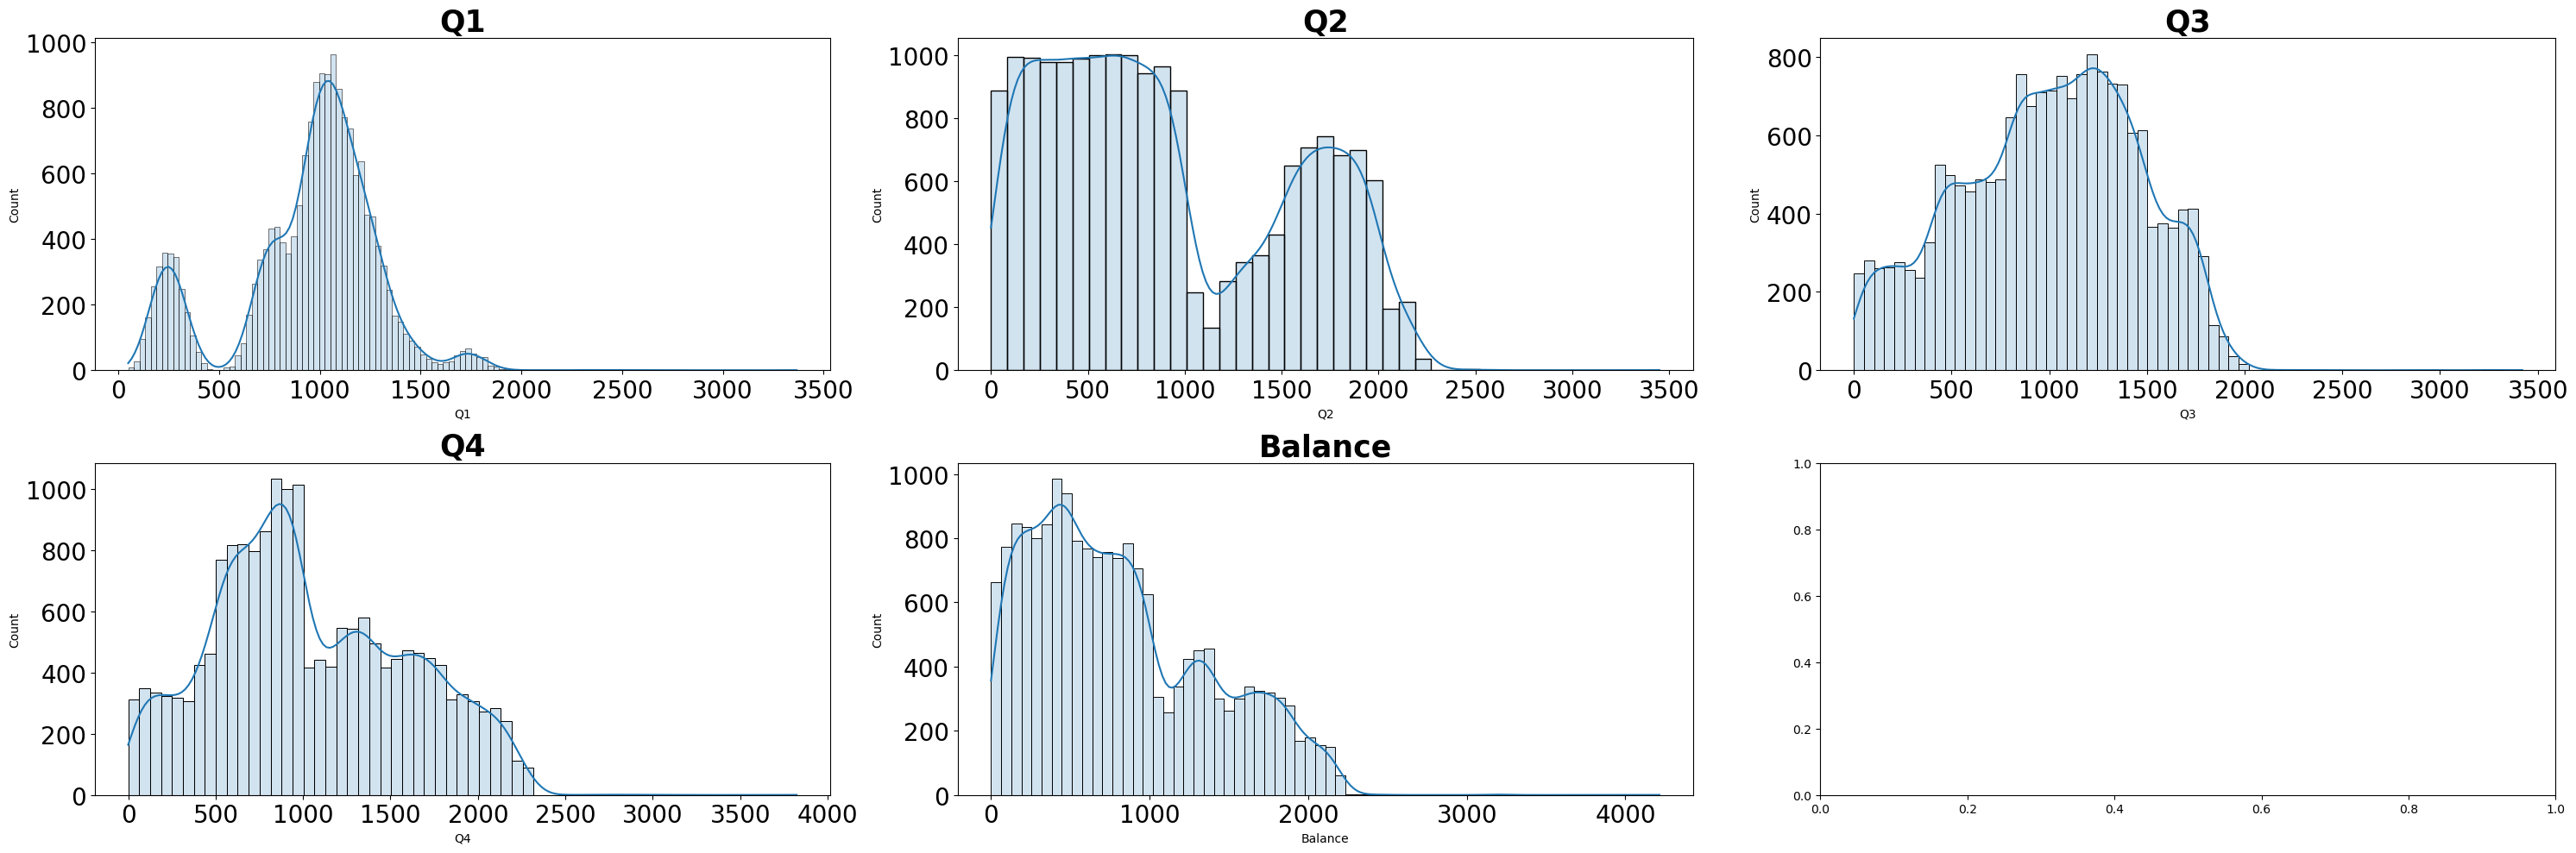

In [19]:
# Distribución de las variables continuas 

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df_numericas_continuas.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_numericas_continuas,
        x = colum,
        kde = True, 
        alpha = 0.2, 
        ax = axes[i])
   
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)


fig.tight_layout();

##### Variables discretas 

In [20]:
df_numericas_discretas=df_numericas.drop(["Q1", "Q2", "Q3", "Q4","Balance"], axis=1)

In [21]:
df_numericas_discretas.head(2)

,Accounts_open,Credit_cards_held,Homes_owned,Household_size
0,1,2,1,4
1,1,2,2,5


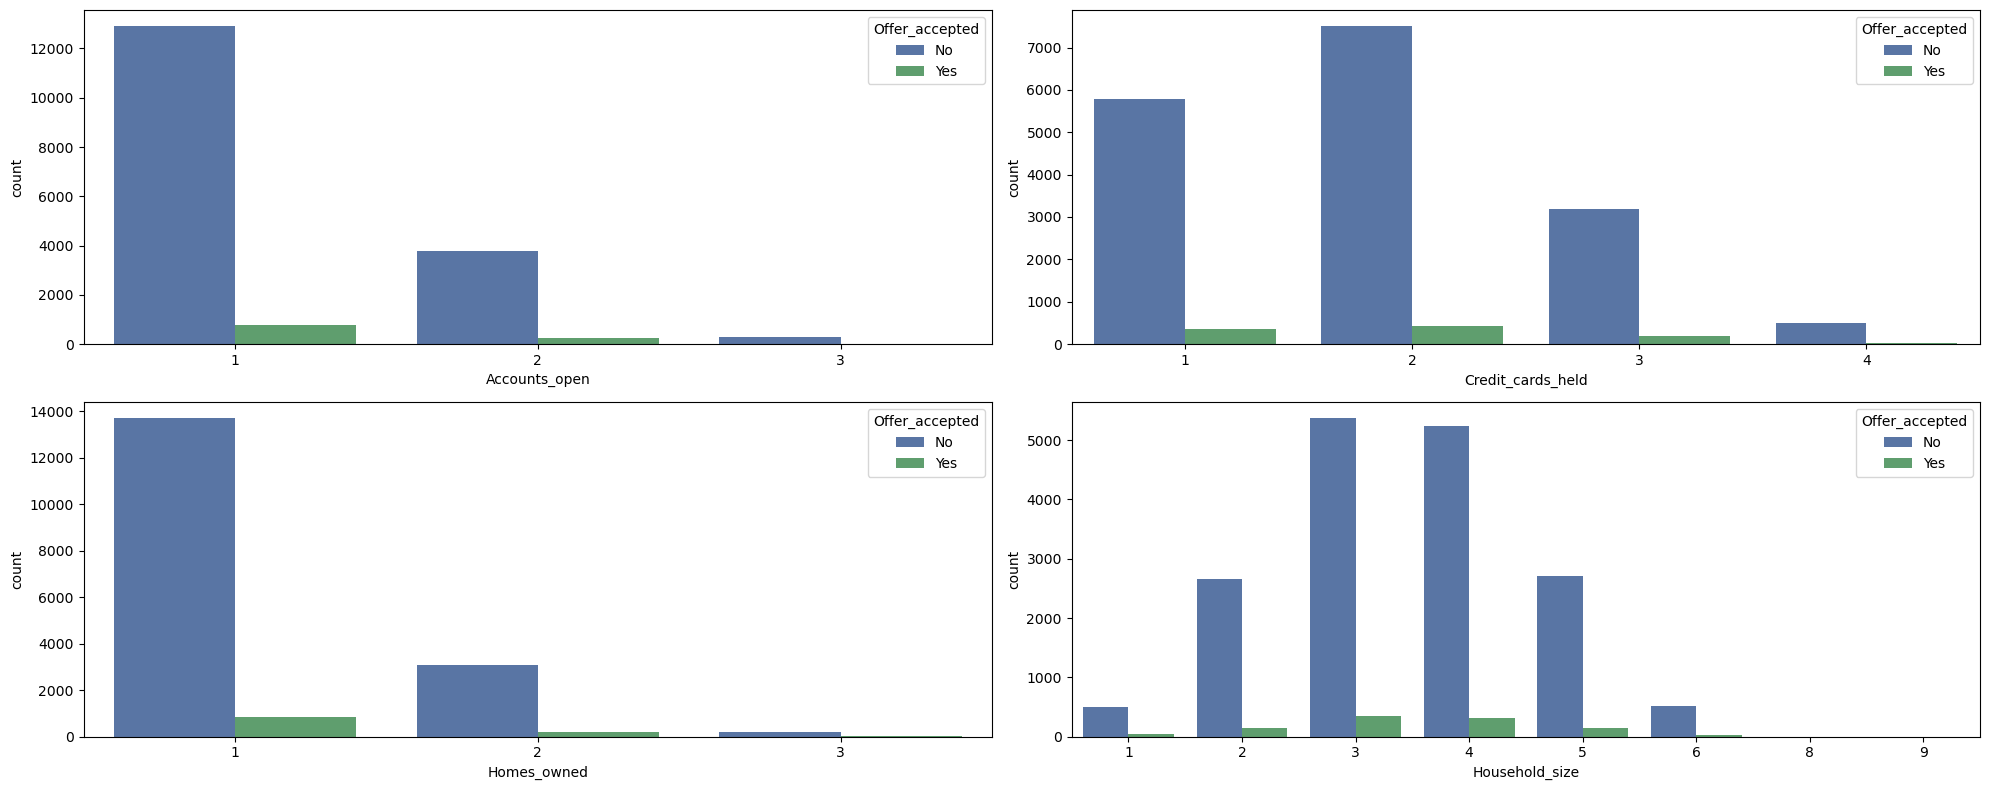

In [22]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 8))

axes = axes.flat

columnas_numeric_discr = df_numericas_discretas.select_dtypes(include = np.number).columns

# Lista de colores para cada categoría
colores = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

for i, colum in enumerate(columnas_numeric_discr):
    chart = sns.countplot(
                x = df_numericas_discretas[colum], 
                hue = df["Offer_accepted"],
                palette = colores,
                ax = axes[i])
fig.tight_layout();


### Variables categóricas

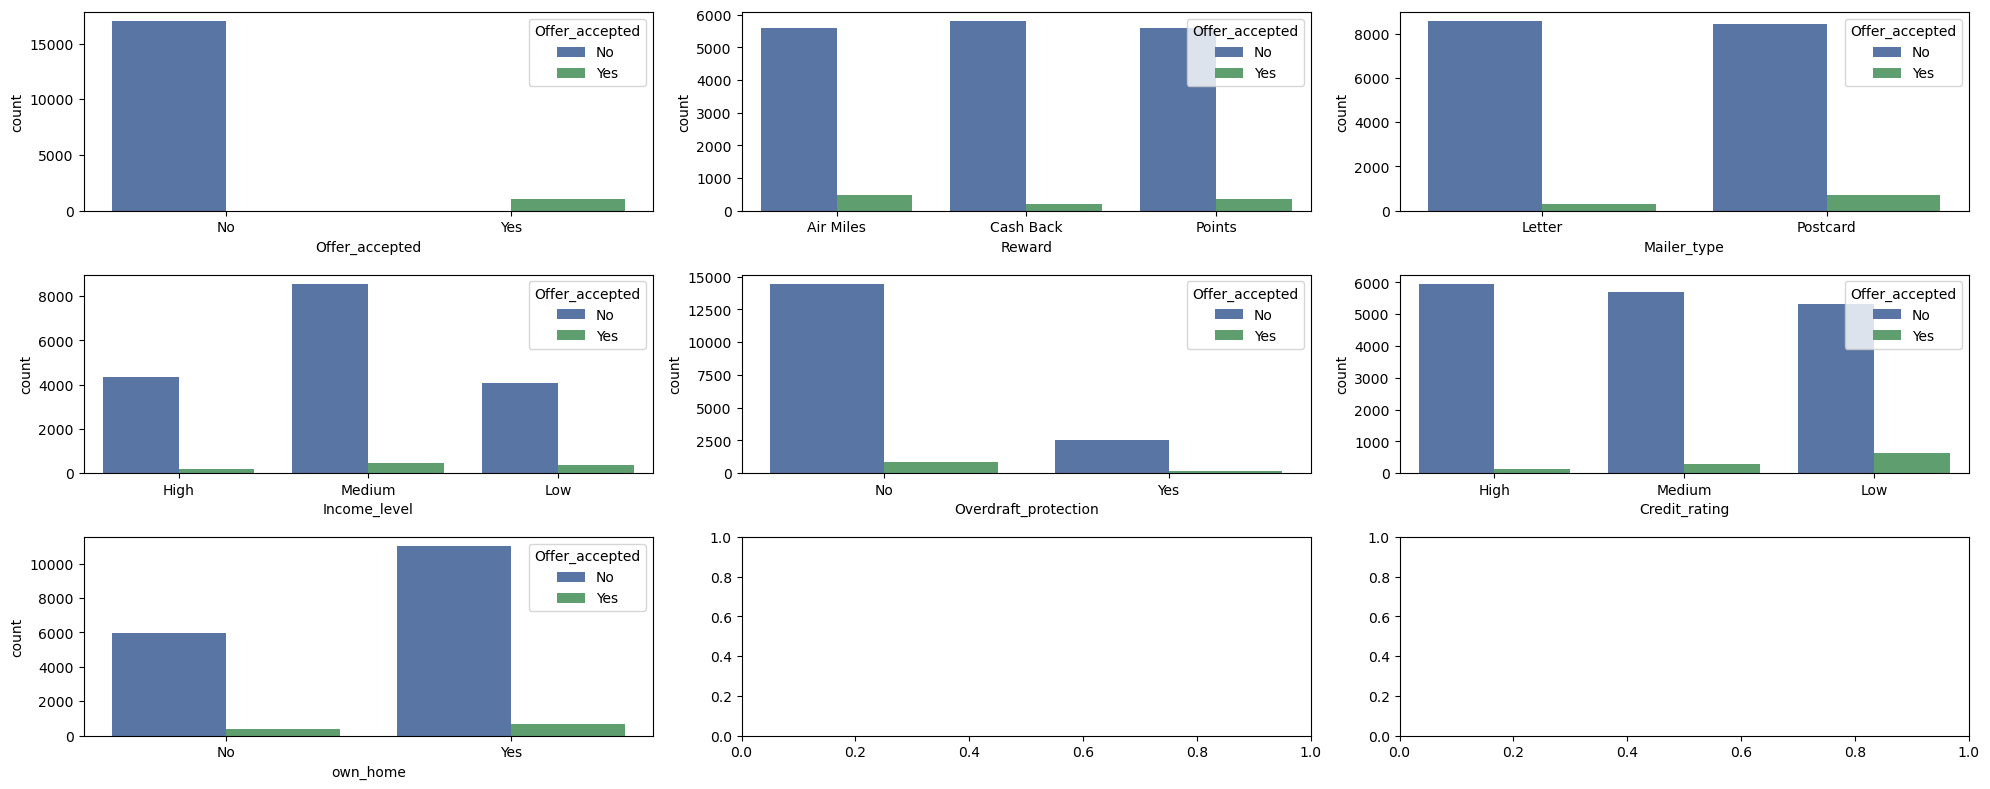

In [23]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 8))

axes = axes.flat

columnas_cat =  df.select_dtypes(include = "object").columns

# Lista de colores para cada categoría
colores = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

for i, colum in enumerate(columnas_cat):
    chart = sns.countplot(
                x = df[colum], 
                hue = df["Offer_accepted"],
                palette = colores,
                ax = axes[i])
fig.tight_layout();


## Gráfico de correlación o Heatmap


In [24]:
correlation = df_numericas.corr()
correlation

,Accounts_open,Credit_cards_held,Homes_owned,Household_size,Q1,Q2,Q3,Q4,Balance
Accounts_open,1.000000,-0.001728,0.004772,0.008479,-0.003909,-0.002814,-0.007956,0.000190,-0.000356
Credit_cards_held,-0.001728,1.000000,-0.002547,-0.003074,-0.003469,-0.009446,-0.007373,-0.007623,0.015362
Homes_owned,0.004772,-0.002547,1.000000,0.005304,0.017967,0.013143,0.009758,0.007775,0.014775
Household_size,0.008479,-0.003074,0.005304,1.000000,-0.003582,-0.005080,-0.008766,0.003633,0.000232
Q1,-0.003909,-0.003469,0.017967,-0.003582,1.000000,0.481507,0.800285,0.752741,0.572380
Q2,-0.002814,-0.009446,0.013143,-0.005080,0.481507,1.000000,0.483134,-0.060961,-0.237283
Q3,-0.007956,-0.007373,0.009758,-0.008766,0.800285,0.483134,1.000000,0.487710,0.168955
Q4,0.000190,-0.007623,0.007775,0.003633,0.752741,-0.060961,0.487710,1.000000,0.565298
Balance,-0.000356,0.015362,0.014775,0.000232,0.572380,-0.237283,0.168955,0.565298,1.000000


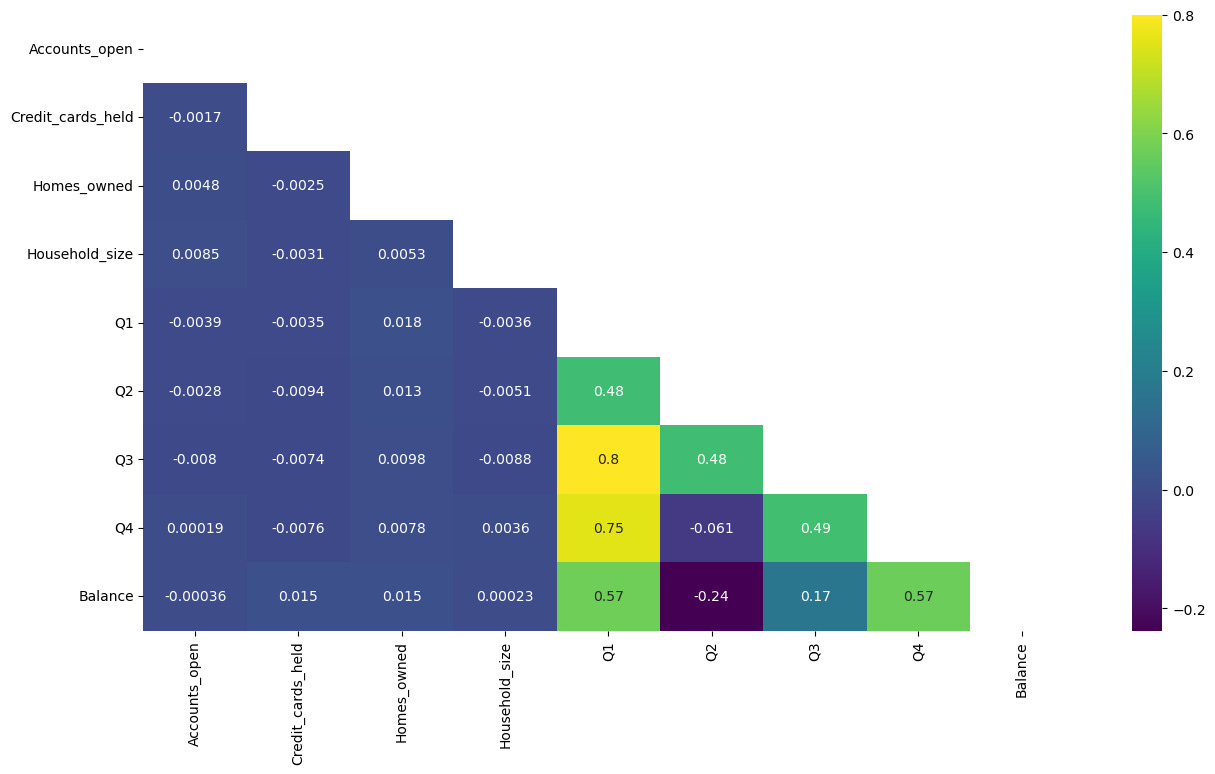

In [25]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); #barra lateral

# Preprocesamiento


## Gestón de nulos 

In [26]:
df.isnull().sum()

Offer_accepted           0
Reward                   0
Mailer_type              0
Income_level             0
Accounts_open            0
Overdraft_protection     0
Credit_rating            0
Credit_cards_held        0
Homes_owned              0
Household_size           0
own_home                 0
Q1                      24
Q2                      24
Q3                      24
Q4                      24
Balance                 24
dtype: int64

In [27]:
# resumen variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Accounts_open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_cards_held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [28]:
# reemplazamos los valores por la mediana 
df["Balance"].replace(np.nan, df["Balance"].median(), inplace = True)

In [29]:
df.isnull().sum()

Offer_accepted           0
Reward                   0
Mailer_type              0
Income_level             0
Accounts_open            0
Overdraft_protection     0
Credit_rating            0
Credit_cards_held        0
Homes_owned              0
Household_size           0
own_home                 0
Q1                      24
Q2                      24
Q3                      24
Q4                      24
Balance                  0
dtype: int64

In [30]:
df["Q1"].replace(np.nan, df["Q1"].median(), inplace = True)
df["Q2"].replace(np.nan, df["Q2"].median(), inplace = True)
df["Q3"].replace(np.nan, df["Q3"].median(), inplace = True)
df["Q4"].replace(np.nan, df["Q4"].median(), inplace = True)


In [31]:
df.isnull().sum()

Offer_accepted          0
Reward                  0
Mailer_type             0
Income_level            0
Accounts_open           0
Overdraft_protection    0
Credit_rating           0
Credit_cards_held       0
Homes_owned             0
Household_size          0
own_home                0
Q1                      0
Q2                      0
Q3                      0
Q4                      0
Balance                 0
dtype: int64

## Gestión de outliers

In [38]:
df_numericas.head()

,Accounts_open,Credit_cards_held,Homes_owned,Household_size,Q1,Q2,Q3,Q4,Balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


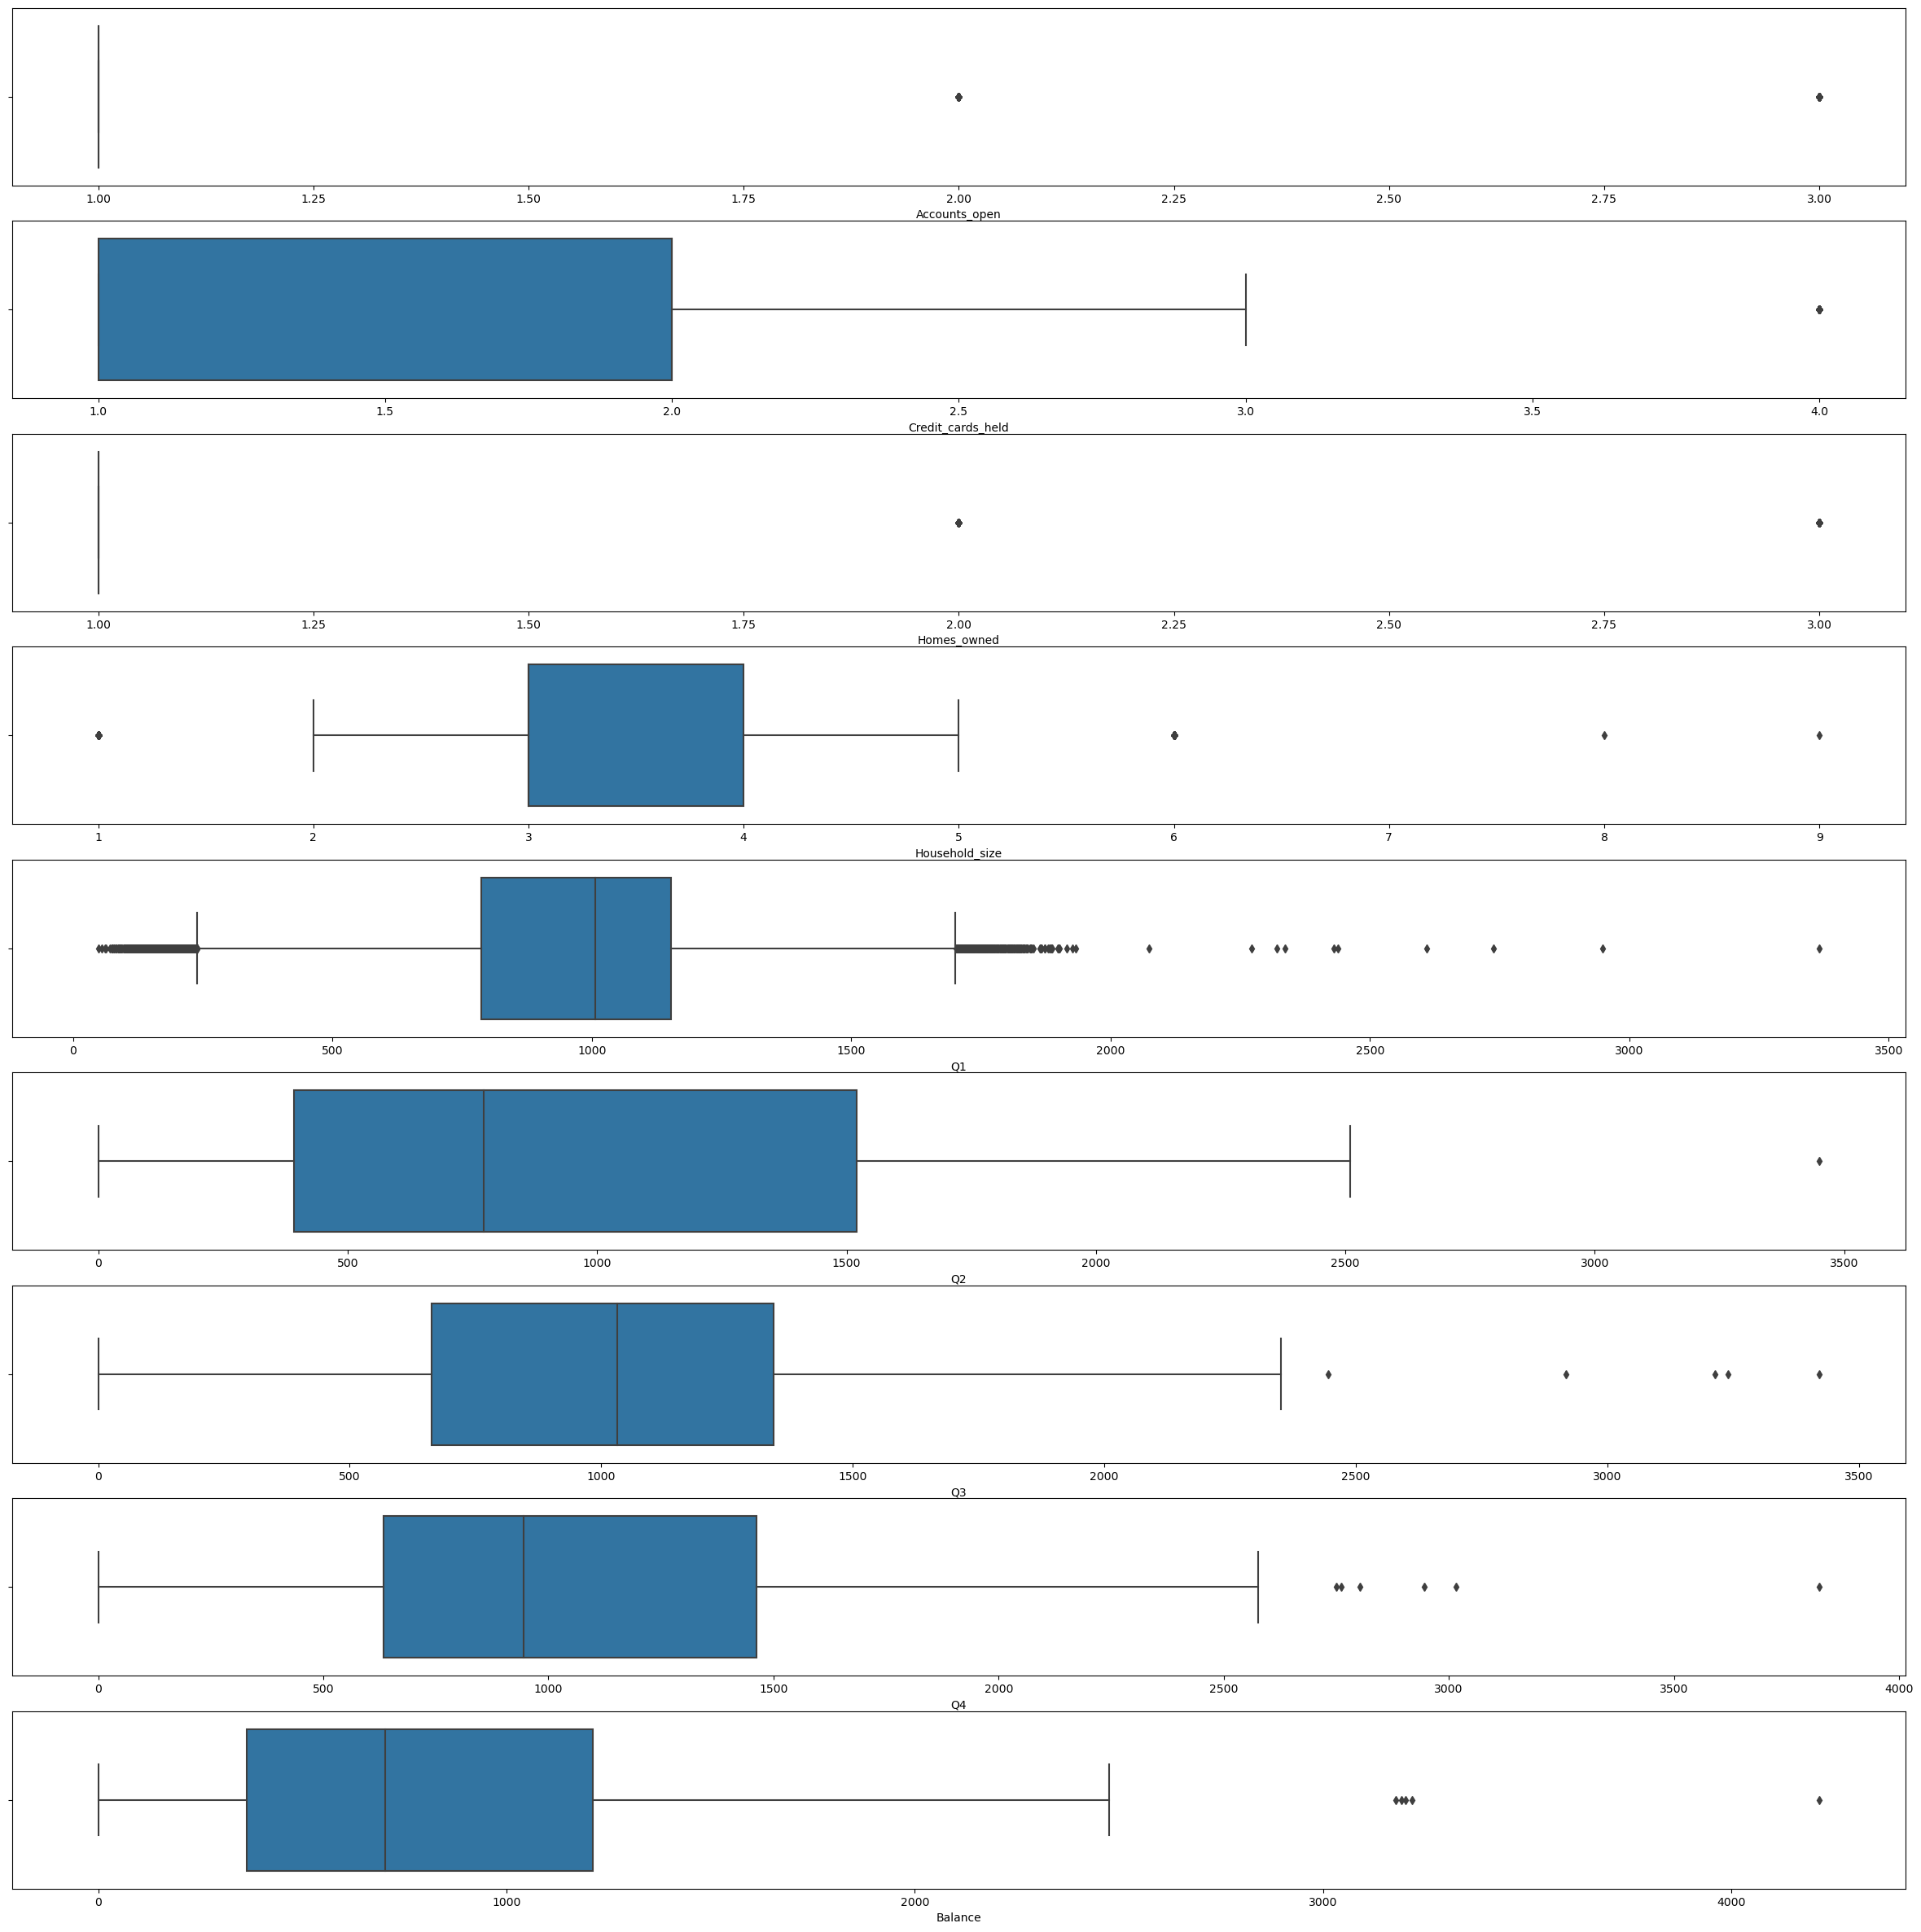

In [39]:
fig, ax = plt.subplots(9, 1, figsize=(30,30))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [40]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [41]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['Accounts_open', 'Credit_cards_held', 'Homes_owned', 'Household_size',
       'Q1', 'Q2', 'Q3', 'Q4', 'Balance'],
      dtype='object')

In [42]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)


In [43]:
ind.keys()

dict_keys(['Accounts_open', 'Credit_cards_held', 'Homes_owned', 'Household_size', 'Q1', 'Q2', 'Q3', 'Q4', 'Balance'])

In [44]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = mediana 

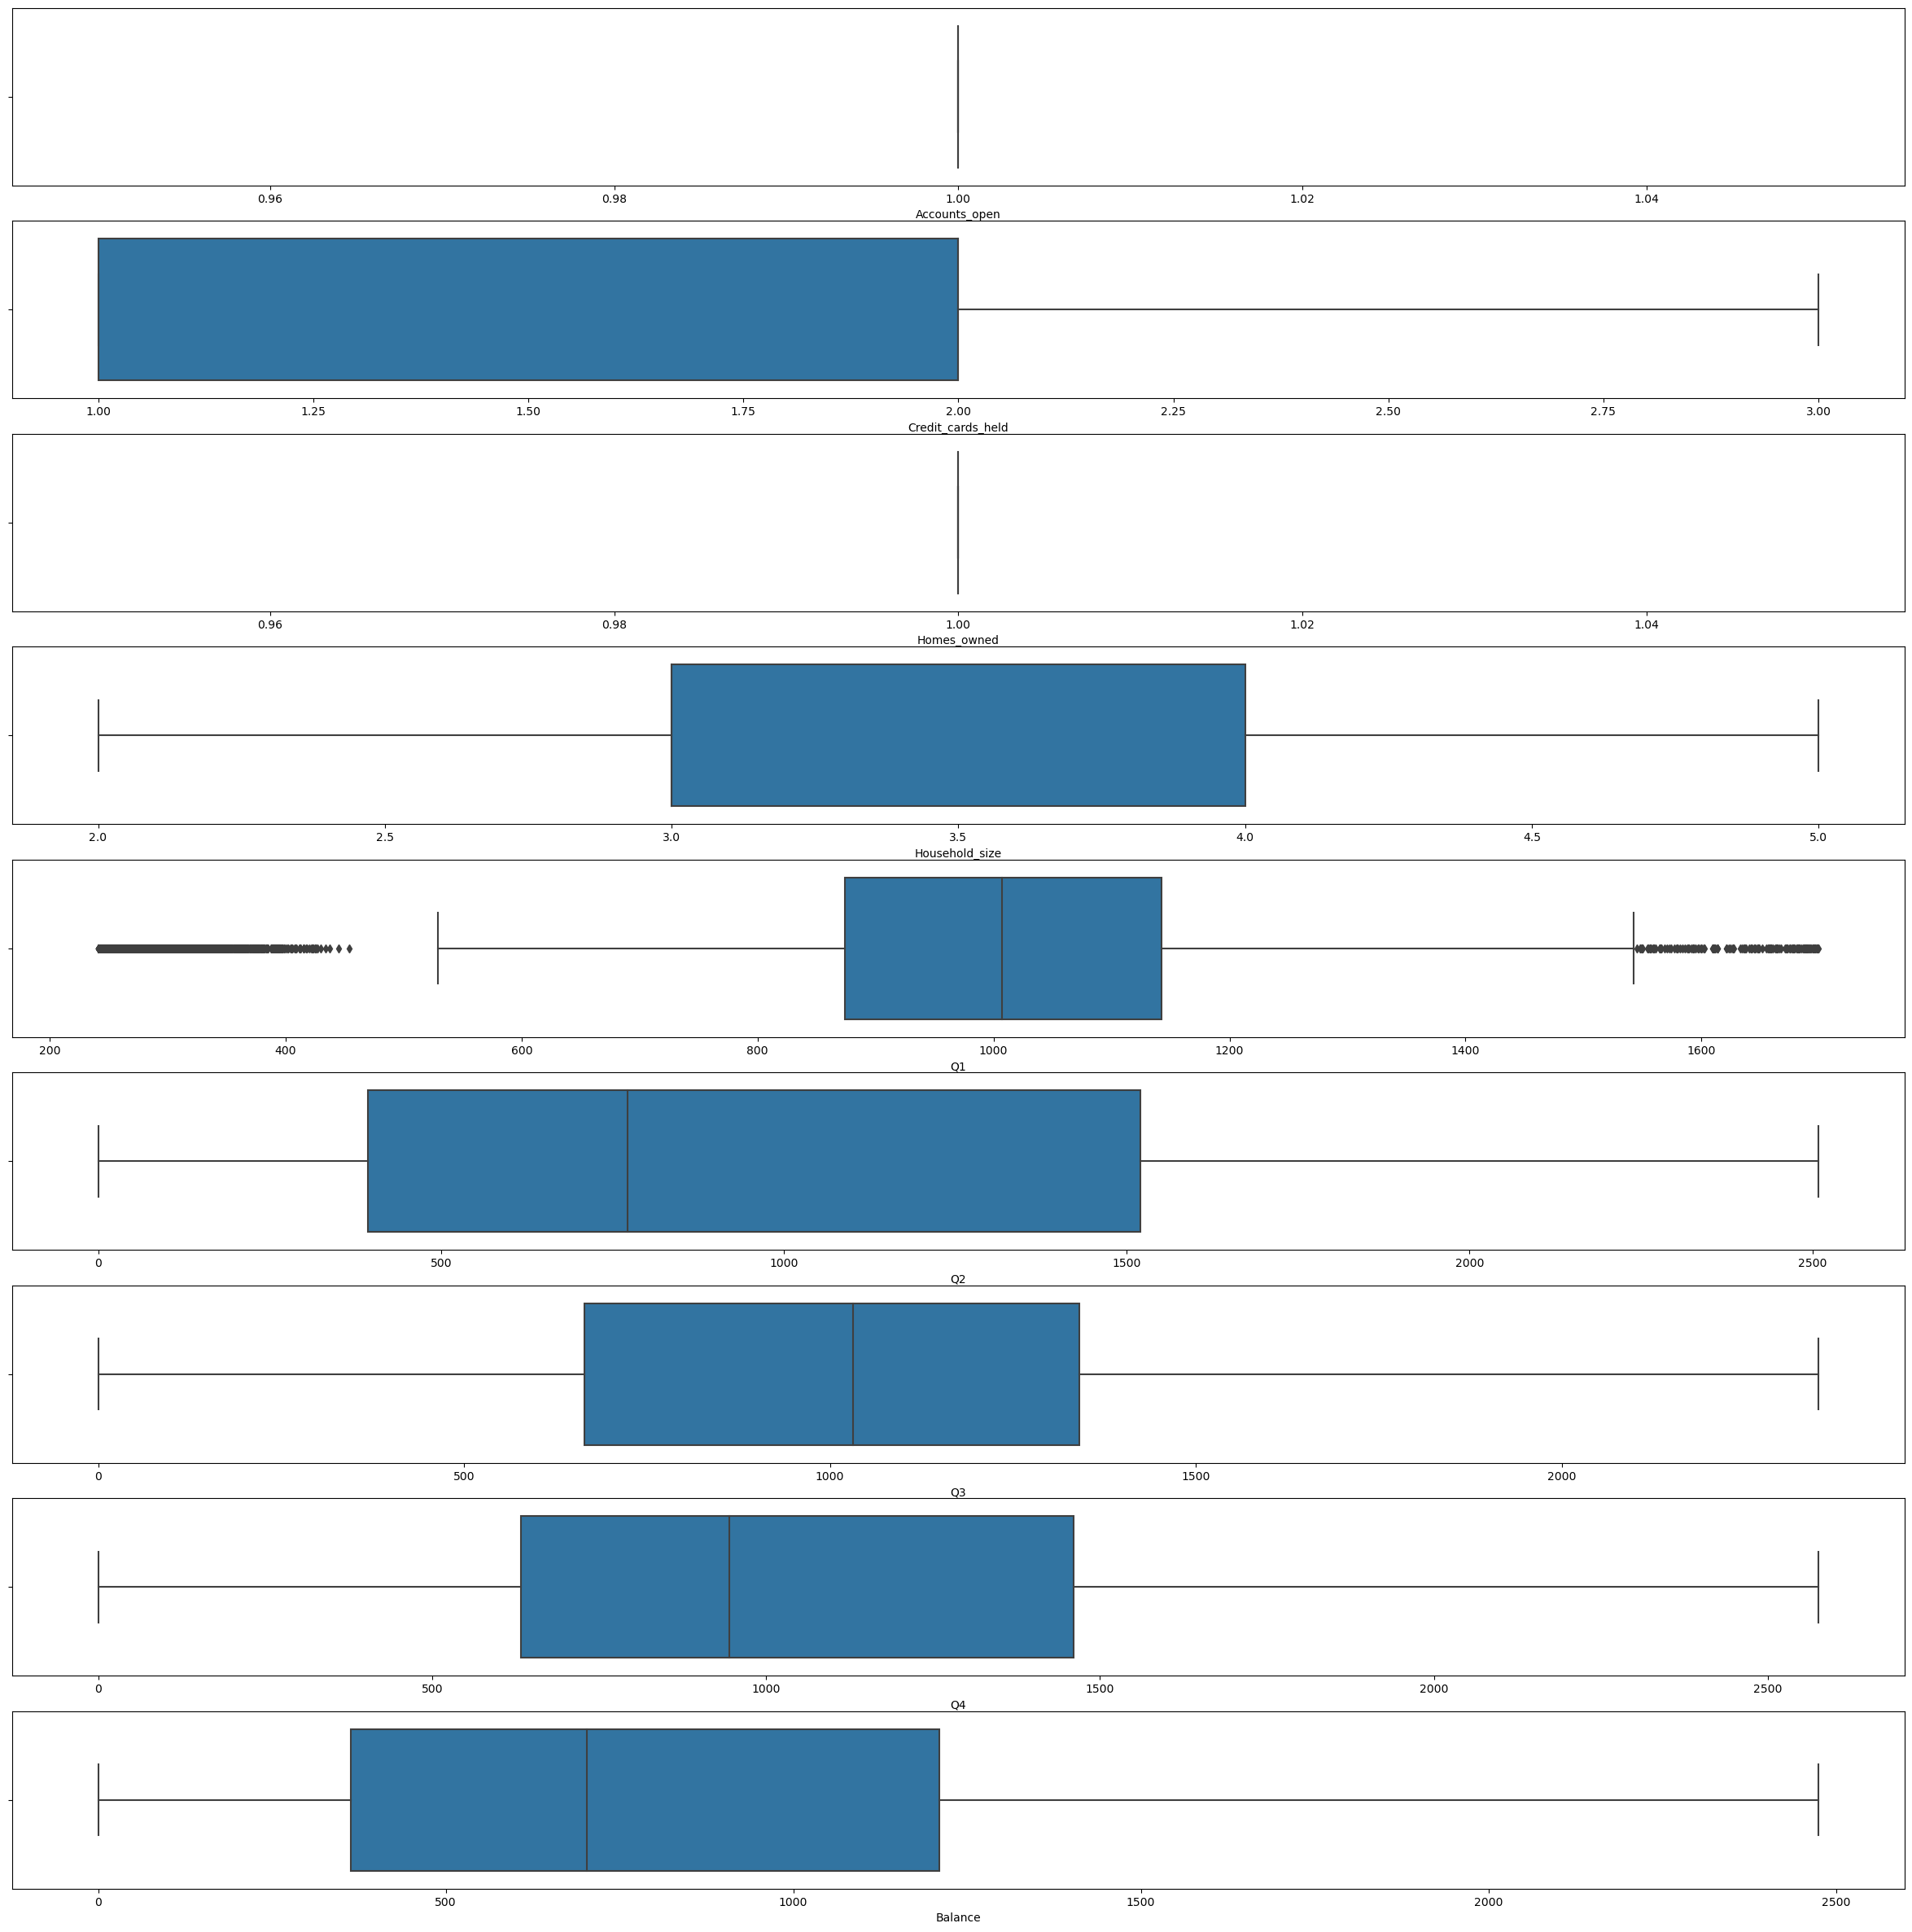

In [45]:
fig, ax = plt.subplots(9, 1, figsize=(30,30))
df_numericas4= df.select_dtypes(include = np.number)

for i in range(len(df_numericas4.columns)):
    sns.boxplot(x=df_numericas4.columns[i], data=df_numericas4, ax=ax[i])
plt.show()

#  Estandarización


In [51]:
from sklearn.preprocessing import RobustScaler

#### variables numéricas continuas

In [46]:
df.head(2)

,Offer_accepted,Reward,Mailer_type,Income_level,Accounts_open,Overdraft_protection,Credit_rating,Credit_cards_held,Homes_owned,Household_size,own_home,Q1,Q2,Q3,Q4,Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,1,5,Yes,1007.00,39.0,106.0,78.0,366.0


In [48]:
df_numericas_continuas.head(1)

,Q1,Q2,Q3,Q4,Balance
0,1160.75,1669.0,877.0,1095.0,1002.0


In [59]:
columnas_num_cont=df_numericas_continuas.columns

In [60]:
robust = RobustScaler()
robust.fit(df[columnas_num_cont])
X_robust = robust.transform(df[columnas_num_cont])

In [62]:
df[["Q1", "Q2", "Q3", "Q4","Balance"]] = X_robust
df.head()

,Offer_accepted,Reward,Mailer_type,Income_level,Accounts_open,Overdraft_protection,Credit_rating,Credit_cards_held,Homes_owned,Household_size,own_home,Q1,Q2,Q3,Q4,Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,0.573694,0.795918,-0.228867,0.180556,0.353219
1,No,Air Miles,Letter,Medium,1,No,Medium,2,1,5,Yes,0.000000,-0.650399,-1.367294,-1.047705,-0.398110
2,No,Air Miles,Postcard,High,1,No,Medium,2,1,2,Yes,-2.725746,-0.359361,-1.004061,-0.966787,-0.544595
3,No,Air Miles,Letter,Medium,1,No,High,1,1,4,No,0.791045,0.715173,1.074935,0.209541,-0.335499
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,Yes,0.761194,1.213842,0.479882,0.044082,-0.399291


In [67]:
#guardamos el escaler en un pickle

import pickle

with open('datos/estandarizacion.pkl', 'wb') as s:
    pickle.dump(robust, s)

# Codificación

Se coificarán las variables categóricas y las variables numéricas discretas. 

In [68]:
df.head(1)

,Offer_accepted,Reward,Mailer_type,Income_level,Accounts_open,Overdraft_protection,Credit_rating,Credit_cards_held,Homes_owned,Household_size,own_home,Q1,Q2,Q3,Q4,Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,0.573694,0.795918,-0.228867,0.180556,0.353219


In [75]:
df_categoricas= df.drop(["Q1","Q2","Q3","Q4","Balance"], axis=1)

In [78]:
df_categoricas.head(5)

,Offer_accepted,Reward,Mailer_type,Income_level,Accounts_open,Overdraft_protection,Credit_rating,Credit_cards_held,Homes_owned,Household_size,own_home
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No
1,No,Air Miles,Letter,Medium,1,No,Medium,2,1,5,Yes
2,No,Air Miles,Postcard,High,1,No,Medium,2,1,2,Yes
3,No,Air Miles,Letter,Medium,1,No,High,1,1,4,No
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,Yes


In [86]:
print('Offer_accepted--> ', df['Offer_accepted'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Reward--> ', df['Reward'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Mailer_type -->', df['Mailer_type'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Income_level -->', df['Income_level'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Accounts_open -->', df['Accounts_open'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Overdraft_protection -->', df['Overdraft_protection'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Credit_rating -->', df['Credit_rating'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Credit_cards_held-->', df['Credit_cards_held'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Homes_owned -->', df['Homes_owned'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Household_size -->', df['Household_size'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('own_home -->', df['Overdraft_protection'].unique(), 'categories')


Offer_accepted-->  ['No' 'Yes'] categories
---------------------------------------------------------------------------
Reward-->  ['Air Miles' 'Cash Back' 'Points'] categories
---------------------------------------------------------------------------
Mailer_type --> ['Letter' 'Postcard'] categories
---------------------------------------------------------------------------
Income_level --> ['High' 'Medium' 'Low'] categories
---------------------------------------------------------------------------
Accounts_open --> [1] categories
---------------------------------------------------------------------------
Overdraft_protection --> ['No' 'Yes'] categories
---------------------------------------------------------------------------
Credit_rating --> ['High' 'Medium' 'Low'] categories
---------------------------------------------------------------------------
Credit_cards_held--> [2 1 3] categories
---------------------------------------------------------------------------
Homes_owned --> 

In [87]:
columnas_cat = df_categoricas.columns

In [89]:
# iniciamos el método
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [90]:
# creemos la función 

def label_encoder(df, columnas):
    for col in df[columnas].columns:
        nuevo_nombre = col + "_encoded"
        df[nuevo_nombre] = le.fit_transform(df[col])
    return df

In [91]:
df_credit_categoric_encoded = label_encoder(df_categoricas,columnas_cat)

In [94]:
df_credit_categoric_encoded=df_credit_categoric_encoded.drop(columnas_cat, axis=1)

In [95]:
df_credit_categoric_encoded

,Offer_accepted_encoded,Reward_encoded,Mailer_type_encoded,Income_level_encoded,Accounts_open_encoded,Overdraft_protection_encoded,Credit_rating_encoded,Credit_cards_held_encoded,Homes_owned_encoded,Household_size_encoded,own_home_encoded
0,0,0,0,0,0,0,0,1,0,2,0
1,0,0,0,2,0,0,2,1,0,3,1
2,0,0,1,0,0,0,2,1,0,0,1
3,0,0,0,2,0,0,0,0,0,2,0
4,0,0,0,2,0,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17995,0,1,0,0,0,0,1,0,0,3,1
17996,0,1,0,0,0,0,1,2,0,1,1
17997,0,1,0,0,0,0,1,1,0,2,0
17998,0,1,0,2,0,0,2,1,0,0,1


- variables sin orden
    - Reward
Mailer_Type
Credit_Rating

# Balanceo de variables 